## ВКР: анализ данных

Автоматизация подбора персонала

Копчев Владислав, БПМИ197

В данном ноутбуке предобработанные в ноутбуке `preprocessing.ipynb` данные мы будем анализировать и делать из них полезные для принятия HR-решений выводы:

### Библиотеки

see описание из `scraping.ipynb`.

In [149]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
# !pip install transliterate
from transliterate import translit
import re
import numpy as np

### Далее

Итак, для начала импортируем нашу табличку, полученную в ноутбуке `preprocessing.ipynb`.

Посмотрим на первые 100 резюме, чтобы понять, как выглядит наша таблица:

In [150]:
df = pd.read_csv('resumes_features.csv')
df.head(100)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Ссылка,Название,Коммандировка,"Опыт работы, лет",О себе,Образование,...,Коммандировка?,Город?,Аналитические комбинации слов,Справочник по интересам,Карьерный рост,"О себе, summarized","О себе, tokens","О себе, flat_tokens","О себе, 3-grams","О себе, avg_tokens"
0,0,1,1,1,https://hh.ru/resume/628596ac000657935b0039ed1...,BI аналитик,"Москва, не готова к переезду, готова к редким ...",Опыт работы 1 год 5 месяцев,В последние годы проходила обучение без возмож...,Высшее образование (Бакалавр)\n2022\nНациональ...,...,не готова к переезду,Москва,---,found smt by rule (Analyst)|(Аналитик данных)|...,True,"Гражданин России, проживающий в Санкт-Петербур...","[array([ 4.2191329e-03, 3.8639535e-04, -8.798...",[ 2.95168342e-04 -1.54395448e-03 -1.38613814e-...,"['последний год проходить', 'год проходить обу...",-0.000129
1,1,2,2,2,https://hh.ru/resume/dfbcae000004342d8f0039ed1...,BI аналитик,"Москва, не готова к переезду, готова к команди...",Опыт работы 3 года 3 месяца,---,Высшее образование (Бакалавр)\n2019\nСамарский...,...,не готова к переезду,Москва,---,found smt by rule (Analyst)|(Аналитик данных)|...,False,---,"[array([-8.6196875e-03, 3.6657380e-03, 5.189...",[-8.6196875e-03 3.6657380e-03 5.1898835e-03 ...,-,0.000681
2,2,3,3,3,https://hh.ru/resume/bebf6a630008069d8c0039ed1...,Аналитик,"Санкт-Петербург, м. Гражданский проспект, гото...",Опыт работы 7 лет 2 месяца,Имею экономическое образование. Продвинутый по...,Высшее образование (Бакалавр)\n2015\nСанкт-Пет...,...,готов к переезду,Санкт,found smt by rule (SQL)|(Excel)|(Python)|(Tabl...,found smt by rule (Analyst)|(Аналитик данных)|...,False,На данный момент не нахожусь на территории РФ....,"[array([-0.00577433, -0.00298019, 0.00639458,...",[-1.1685997e-03 1.2998827e-03 -2.5936777e-03 ...,"['иметь экономический образование', 'экономиче...",-0.000146
3,3,4,4,4,https://hh.ru/resume/8606f37b000773de980039ed1...,Программист-разработчик,"Москва, м. Петровско-Разумовская, не готов к п...",Опыт работы 1 год 1 месяц,Имеется опыт в создании Android-приложений на ...,Высшее образование (Бакалавр)\n2022\nЧелябинск...,...,не готов к переезду,Москва,found smt by rule (SQL)|(Excel)|(Python)|(Tabl...,---,False,В настоящее время я работаю в сфере разработки...,"[array([-8.7200766e-03, 9.9531859e-03, -2.345...",[-4.07442392e-04 5.87383693e-04 8.51579127e-...,"['иметься опыт создание', 'опыт создание andro...",0.000049
4,4,5,5,5,https://hh.ru/resume/993bd0980002dd6cff0039ed1...,Аналитик Bi,"Москва, м. Сокол, готов к переезду, готов к ко...",Опыт работы 10 лет 7 месяцев,Уверенный пользователь.\nЖелание оптимизации и...,Высшее образование\n2010\nДальневосточный госу...,...,готов к переезду,Москва,found smt by rule (SQL)|(Excel)|(Python)|(Tabl...,found smt by rule (Analyst)|(Аналитик данных)|...,False,"Уверенный пользователь Microsoft Dynamics AX, ...","[array([ 6.2332065e-03, -1.6407053e-03, 5.968...",[-3.7161107e-04 2.3680142e-04 -1.6213297e-04 ...,"['уверенный пользователь желание', 'пользовате...",-0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,69,69,69,https://hh.ru/resume/15abcb4a000902e72c0039ed1...,Аналитик,"Москва, готов к переезду, готов к командировкам",Опыт работы 1 год 6 месяцев,В последние годы я проходил обучение без возмо...,Высшее образование (Бакалавр)\n2022\nРоссийски...,...,готов к переезду,Москва,found smt by rule (SQL)|(Excel)|(Python)|(Tabl...,found smt by rule (Analyst)|(Аналитик данных)|...,False,NaN,"[array([ 4.2191329e-03, 3.8639535e-04, -8.798...",[-4.9789756e-04 -5.4419227e-04 -2.5611392e-03 ...,"['последний год проходить', 'год проходить обу...",-0.000504
63,63,70,70,70,https://hh.ru/resume/e1b370df0007951de20039ed1...,Аналитик,"Москва, м. Лермонтовский проспект, готов к пер...",Опыт работы 20 лет 5 месяцев,"владею инструментарием обработки, анализа и ви...",Высшее образование (Магистр)\n2007\nМосковский...,...,готов к переезду,Москва,---,found smt by rule (Analys

Разметка данных ручная:

In [151]:
df1 = df.head(100)

In [152]:
df1['analyst'] = [0, 1, 2, 2ZZZ, 1, 0, 2, 1, 0, 1, 2] + 89 * [0]
df1['scientist'] = [0, 0, 0, 0, 0, 1, 1, 1] + 92 * [0]

SyntaxError: invalid syntax (1010328942.py, line 1)

In [153]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [154]:
X = df1[['Кол-во образований', 'Кол-во образований']]

In [155]:
y = df1['analyst']

KeyError: 'analyst'

In [156]:
reg = LinearRegression()

In [157]:
reg.fit(X, y)

NameError: name 'y' is not defined

In [158]:
reg.score(X, y)

NameError: name 'y' is not defined

In [159]:
reg.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

**Итак, текст размечен для классификации. Теперь сегментация по "О себе".**

pre-processing

Кластеризуем:

In [264]:
df = pd.read_csv('resumes_features.csv')

In [265]:
X = df['О себе, flat_tokens']

In [266]:
for i in range(len(X)):
    # print(i)
    X[i] = X[i].replace('\n', '').replace('[ ', '').replace(' ]', '').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('[', '').replace(']', '').split(' ')
    X[i] = [float(i) for i in X[i]]

/var/folders/0k/pk7zyw6x2sqcjpbqvgf0ssh80000gn/T/ipykernel_9955/3779291681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].replace('\n', '').replace('[ ', '').replace(' ]', '').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('[', '').replace(']', '').split(' ')
/var/folders/0k/pk7zyw6x2sqcjpbqvgf0ssh80000gn/T/ipykernel_9955/3779291681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = [float(i) for i in X[i]]


In [289]:
pd.DataFrame(X)['О себе, flat_tokens']

0     [0.000295168342, -0.00154395448, -0.0013861381...
1     [-0.0086196875, 0.003665738, 0.0051898835, 0.0...
2     [-0.0011685997, 0.0012998827, -0.0025936777, 0...
3     [-0.000407442392, 0.000587383693, 0.0008515791...
4     [-0.00037161107, 0.00023680142, -0.00016213297...
                            ...                        
62    [-0.00049789756, -0.00054419227, -0.0025611392...
63    [-0.00211551553, -0.000514384184, 0.0004572586...
64    [7.9651163e-06, 2.841573e-05, 0.00020546571, 0...
65    [0.00088479457, 0.00048863521, 0.00014909195, ...
66    [-6.5130975e-05, -0.00063547277, -0.0009241980...
Name: О себе, flat_tokens, Length: 67, dtype: object

In [288]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(
                init="random",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=42
            )

kmeans.fit(pd.DataFrame(X))

ValueError: setting an array element with a sequence.

In [40]:
for x in embs_flattened:
    print(len(x))

NameError: name 'embs_flattened' is not defined

Почитать:

Тоже уменьшить как-то размер ноутбука

In [16]:
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0], dtype=int32)

In [17]:
# kmeans.predict([[0, 0], [12, 3]])

In [18]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [19]:
X

,Кол-во образований,Кол-во образований
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
62,1,1
63,2,2
64,2,2
65,1,1


t-sne analysis

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x = scaler.fit_transform(X)

In [21]:
x

array([[-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [ 2.83790882,  2.83790882],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [ 1.9367719 ,  1.9367719 ],
       [-0.76663888, -0.76663888],
       [ 1.03563497,  1.03563497],
       [ 0.13449805,  0.13449805],
       [-0.76663888, -0.76663888],
       [ 0.13449805,  0.13449805],
       [ 1.03563497,  1.03563497],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [ 0.13449805,  0.13449805],
       [-0.76663888, -0.76663888],
       [-0.76663888, -0.76663888],
       [ 0.13449805,  0.13449805],
       [ 0.13449805,  0.13449805],
       [-0.76663888, -0.76663888],
       [ 0.13449805,  0.13449805],
       [ 0.13449805,  0.13449805],
       [ 0.13449805,

In [22]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [23]:
pca.explained_variance_ratio_[:2].sum()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [24]:
principal

NameError: name 'principal' is not defined

In [25]:
import seaborn as sns

In [26]:
sns.scatterplot(principal['principal component 1'], principal['principal component 2'])

NameError: name 'principal' is not defined

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(principal)
l = kmeans.labels_

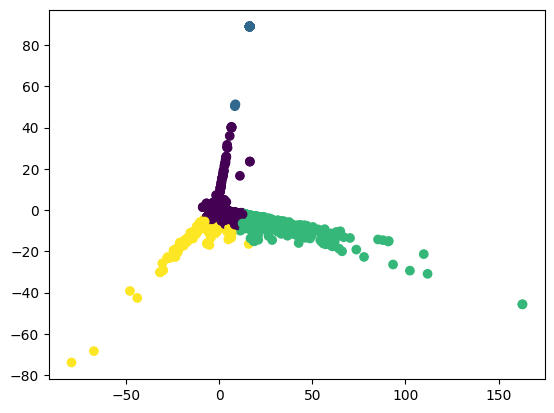

In [71]:
plt.scatter(principal['principal component 1'], 
             principal['principal component 2'],
             c=l,
           )

In [67]:
df['clust'] = l

In [73]:
df.loc[df['clust']==1]['О себе']

69       В последние годы я проходил обучение без возмо...
178      В последние годы проходил обучение без возможн...
324      В последние годы проходил обучение без возможн...
911      В последние годы я проходила обучение без возм...
1750     В последние годы я проходил обучение без возмо...
                               ...                        
19638    В последние годы я проходил обучение без возмо...
19645    В последние годы проходил обучение без возможн...
19667    В последние годы я проходил обучение без возмо...
19728    В последние годы я проходил обучение без возмо...
19765    В последние годы проходила обучение без возмож...
Name: О себе, Length: 67, dtype: object

In [74]:
df.loc[df['clust']==0]['О себе']

0        Responsible, communicable, quick study and det...
1        В последние годы проходила обучение без возмож...
2                                                      ---
3        Имею экономическое образование. Продвинутый по...
4        Имеется опыт в создании Android-приложений на ...
                               ...                        
19813    Высокая работоспособность, вдумчивость, уравно...
19814    Увлекаюсь спортом, вредные привычки отсутствую...
19815    Уверенный пользователь ПК, работа с оргтехнико...
19816    Я абсолютно честен и очень ответственен. Люблю...
19817    I. ОБЩАЯ ПОДГОТОВЛЕННОСТЬ И ОПЫТ РАБОТЫ\n\nДел...
Name: О себе, Length: 18774, dtype: object

In [75]:
df.loc[df['clust']==2]['О себе']

21       Аналитический склад ума, ответственная, пункту...
40       Ответственный, исполнительный, целеустремленны...
83       Аналитический склад ума, критическое мышление,...
114      Аналитический склад ума, ответственность, стре...
122      Аналитический склад ума. Системное мышление. Ц...
                               ...                        
19753    Аналитический склад ума, умение работать в ком...
19771    Стрессоустойчивость, коммуникабельность, спосо...
19776    Стрессоустойчивость, обучаемость, работа с бол...
19782    умение работать в команде, общительность, целе...
19788    Я быстро обучаюсь, всегда концентрирован на за...
Name: О себе, Length: 641, dtype: object

In [76]:
df.loc[df['clust']==4]['О себе']

Series([], Name: О себе, dtype: object)

итог: кластеры плохие, мб как раз дело в том, что слишком простой метод постреония эмбеддингов

In [ ]:
df.iloc[0]['Ссылка']

**что дальше?**

- 3 ноутбука с содержанием
- разметка, образование
- эксперименты с эмбеддингами [в таблице q | emb_w2v | emd d2v | etc.], моделями, учусь сравнивать supervised и semi-supervised

Сравнение:
- https://stats.stackexchange.com/questions/498580/semi-supervised-learning-vs-supervised
- https://ifoadatascienceresearch.github.io/tutorial/comparison/
- https://math.stackexchange.com/questions/3927928/semisupervised-vs-supervised-learning

Интерпретировать результаты.